In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_biclusters, make_multilabel_classification

In [3]:
def plot_multi_lables(X, y):
    pd.DataFrame(X).plot(x=0,y=1,kind='scatter', c=y[:,0]+(y[:,1]*2), cmap='cool')
    plt.show()

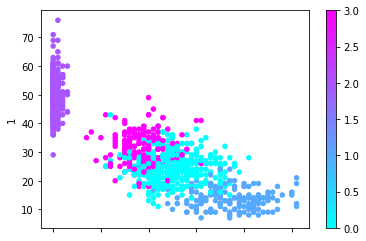

In [4]:
data = make_multilabel_classification(n_samples=1000, n_features=2, n_classes=2, n_labels=1, random_state=14)
plot_multi_lables(data[0],data[1])

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

In [6]:
X = preprocessing.scale(data[0] ,axis=0)  
y = data[1]

In [7]:
pd.DataFrame(X)

,0,1
0,-1.411528,0.898404
1,0.111402,-0.859295
2,0.339842,-0.273395
3,-1.487674,0.751929
4,-1.487674,1.411066
5,-0.345477,0.239267
6,0.568281,-0.419870
7,0.187549,-0.273395
8,-0.878502,0.458979
9,-1.487674,1.337828


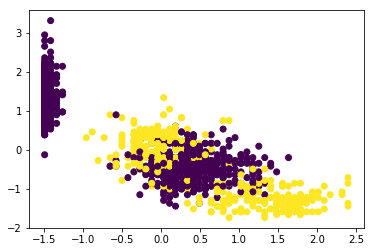

In [8]:
plt.scatter(x = X[:,0], y = X[:,1], c = y[:,0])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [10]:
nn = MLPClassifier(hidden_layer_sizes=(3), 
                   activation='logistic', 
                   learning_rate_init=0.5, 
                   max_iter=1, warm_start=True)

In [11]:
from rgb_nn import RGB_NN

In [12]:
rgb = RGB_NN(server_loc='0.0.0.0', scale=(-5,5))
rgb._dummy_api = True
rgb._verbose = True

/Users/zackakil/anaconda/envs/dev/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.630303030303


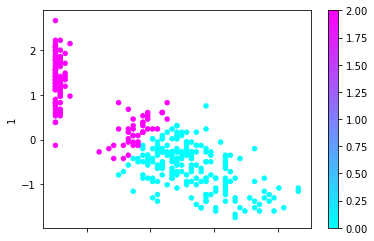

val -2.490957795961273 normed to 0.25090422040387267 to color [126, 255, 0]
mapping led 5
val -2.490957795961273 normed to 0.25090422040387267 to color [126, 255, 0]
mapping led 11
val -0.28659546500663946 normed to 0.47134045349933607 to color [0, 255, 211]
mapping led 6
val -0.28659546500663946 normed to 0.47134045349933607 to color [0, 255, 211]
mapping led 20
val 1.9625281589106334 normed to 0.6962528158910632 to color [45, 0, 255]
mapping led 7
val 1.9625281589106334 normed to 0.6962528158910632 to color [45, 0, 255]
mapping led 28
val 2.3365170777478004 normed to 0.73365170777478 to color [102, 0, 255]
mapping led 0
val 2.3365170777478004 normed to 0.73365170777478 to color [102, 0, 255]
mapping led 10
val 0.618112345859429 normed to 0.561811234585943 to color [0, 160, 255]
mapping led 1
val 0.618112345859429 normed to 0.561811234585943 to color [0, 160, 255]
mapping led 18
val -1.3115879892873399 normed to 0.368841201071266 to color [0, 255, 54]
mapping led 2
val -1.311587989287

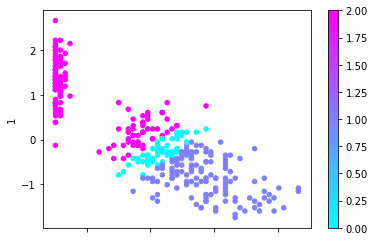

val -2.750039609943663 normed to 0.22499603900563372 to color [165, 255, 0]
mapping led 5
val -2.750039609943663 normed to 0.22499603900563372 to color [165, 255, 0]
mapping led 11
val -1.9510365386156334 normed to 0.3048963461384367 to color [43, 255, 0]
mapping led 6
val -1.9510365386156334 normed to 0.3048963461384367 to color [43, 255, 0]
mapping led 20
val 2.8305585456059603 normed to 0.783055854560596 to color [178, 0, 255]
mapping led 7
val 2.8305585456059603 normed to 0.783055854560596 to color [178, 0, 255]
mapping led 28
val 3.6074896005429706 normed to 0.8607489600542971 to color [255, 0, 213]
mapping led 0
val 3.6074896005429706 normed to 0.8607489600542971 to color [255, 0, 213]
mapping led 10
val 2.178244844115968 normed to 0.7178244844115967 to color [78, 0, 255]
mapping led 1
val 2.178244844115968 normed to 0.7178244844115967 to color [78, 0, 255]
mapping led 18
val -2.129433555638878 normed to 0.2870566444361122 to color [70, 255, 0]
mapping led 2
val -2.12943355563887

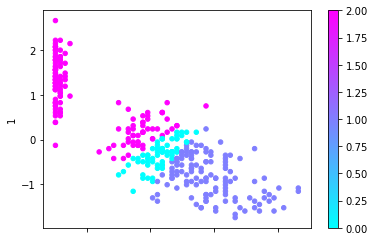

val -1.1523910502185033 normed to 0.3847608949781497 to color [0, 255, 78]
mapping led 5
val -1.1523910502185033 normed to 0.3847608949781497 to color [0, 255, 78]
mapping led 11
val -2.00422424765469 normed to 0.299577575234531 to color [51, 255, 0]
mapping led 6
val -2.00422424765469 normed to 0.299577575234531 to color [51, 255, 0]
mapping led 20
val 3.0480327682958275 normed to 0.8048032768295827 to color [211, 0, 255]
mapping led 7
val 3.0480327682958275 normed to 0.8048032768295827 to color [211, 0, 255]
mapping led 28
val 2.5468070071700306 normed to 0.7546807007170031 to color [134, 0, 255]
mapping led 0
val 2.5468070071700306 normed to 0.7546807007170031 to color [134, 0, 255]
mapping led 10
val 1.374722211910725 normed to 0.6374722211910725 to color [0, 44, 255]
mapping led 1
val 1.374722211910725 normed to 0.6374722211910725 to color [0, 44, 255]
mapping led 18
val -1.3950058549853364 normed to 0.3604994145014664 to color [0, 255, 41]
mapping led 2
val -1.3950058549853364 no

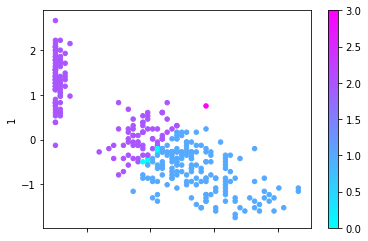

val -1.3811251198093537 normed to 0.3618874880190647 to color [0, 255, 43]
mapping led 5
val -1.3811251198093537 normed to 0.3618874880190647 to color [0, 255, 43]
mapping led 11
val -2.6907255980152383 normed to 0.23092744019847616 to color [156, 255, 0]
mapping led 6
val -2.6907255980152383 normed to 0.23092744019847616 to color [156, 255, 0]
mapping led 20
val 2.5524871954796184 normed to 0.7552487195479618 to color [135, 0, 255]
mapping led 7
val 2.5524871954796184 normed to 0.7552487195479618 to color [135, 0, 255]
mapping led 28
val 1.6155894838551066 normed to 0.6615589483855107 to color [0, 7, 255]
mapping led 0
val 1.6155894838551066 normed to 0.6615589483855107 to color [0, 7, 255]
mapping led 10
val 1.0129334679385562 normed to 0.6012933467938556 to color [0, 100, 255]
mapping led 1
val 1.0129334679385562 normed to 0.6012933467938556 to color [0, 100, 255]
mapping led 18
val -1.47902025805517 normed to 0.352097974194483 to color [0, 255, 28]
mapping led 2
val -1.479020258055

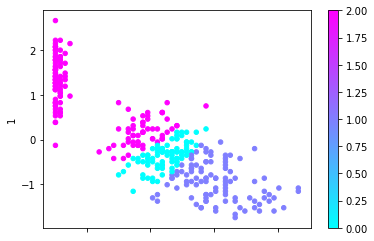

val -1.6770736830014152 normed to 0.33229263169985845 to color [1, 255, 0]
mapping led 5
val -1.6770736830014152 normed to 0.33229263169985845 to color [1, 255, 0]
mapping led 11
val -3.4270511696545882 normed to 0.15729488303454117 to color [255, 240, 0]
mapping led 6
val -3.4270511696545882 normed to 0.15729488303454117 to color [255, 240, 0]
mapping led 20
val 2.667638568202056 normed to 0.7667638568202056 to color [153, 0, 255]
mapping led 7
val 2.667638568202056 normed to 0.7667638568202056 to color [153, 0, 255]
mapping led 28
val 2.6787929287988543 normed to 0.7678792928798854 to color [154, 0, 255]
mapping led 0
val 2.6787929287988543 normed to 0.7678792928798854 to color [154, 0, 255]
mapping led 10
val 1.6037501272697596 normed to 0.660375012726976 to color [0, 9, 255]
mapping led 1
val 1.6037501272697596 normed to 0.660375012726976 to color [0, 9, 255]
mapping led 18
val -1.919816155045456 normed to 0.3080183844954544 to color [38, 255, 0]
mapping led 2
val -1.91981615504545

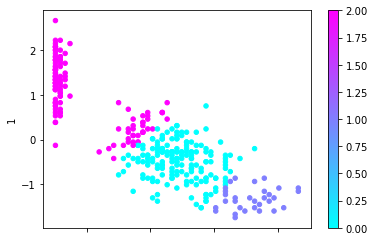

val -3.392418634048579 normed to 0.1607581365951421 to color [255, 245, 0]
mapping led 5
val -3.392418634048579 normed to 0.1607581365951421 to color [255, 245, 0]
mapping led 11
val -3.744892451016628 normed to 0.12551075489833718 to color [255, 192, 0]
mapping led 6
val -3.744892451016628 normed to 0.12551075489833718 to color [255, 192, 0]
mapping led 20
val 2.126426072543075 normed to 0.7126426072543075 to color [70, 0, 255]
mapping led 7
val 2.126426072543075 normed to 0.7126426072543075 to color [70, 0, 255]
mapping led 28
val 3.136043793494136 normed to 0.8136043793494135 to color [224, 0, 255]
mapping led 0
val 3.136043793494136 normed to 0.8136043793494135 to color [224, 0, 255]
mapping led 10
val 1.8381617753787858 normed to 0.6838161775378786 to color [26, 0, 255]
mapping led 1
val 1.8381617753787858 normed to 0.6838161775378786 to color [26, 0, 255]
mapping led 18
val -1.49404313153651 normed to 0.350595686846349 to color [0, 255, 26]
mapping led 2
val -1.49404313153651 nor

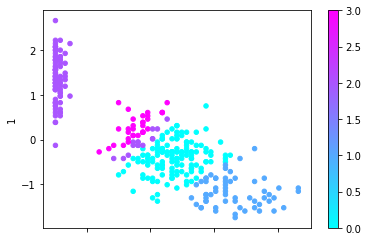

val -4.118842598861224 normed to 0.08811574011387764 to color [255, 134, 0]
mapping led 5
val -4.118842598861224 normed to 0.08811574011387764 to color [255, 134, 0]
mapping led 11
val -3.917954049972191 normed to 0.10820459500278087 to color [255, 165, 0]
mapping led 6
val -3.917954049972191 normed to 0.10820459500278087 to color [255, 165, 0]
mapping led 20
val 2.317459734758907 normed to 0.7317459734758908 to color [99, 0, 255]
mapping led 7
val 2.317459734758907 normed to 0.7317459734758908 to color [99, 0, 255]
mapping led 28
val 3.8580463823424824 normed to 0.8858046382342483 to color [255, 0, 174]
mapping led 0
val 3.8580463823424824 normed to 0.8858046382342483 to color [255, 0, 174]
mapping led 10
val 1.7962899991159478 normed to 0.6796289999115948 to color [19, 0, 255]
mapping led 1
val 1.7962899991159478 normed to 0.6796289999115948 to color [19, 0, 255]
mapping led 18
val -2.3382164752033257 normed to 0.2661783524796674 to color [102, 255, 0]
mapping led 2
val -2.3382164752

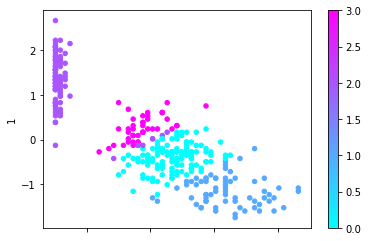

val -3.829870387875457 normed to 0.11701296121245428 to color [255, 179, 0]
mapping led 5
val -3.829870387875457 normed to 0.11701296121245428 to color [255, 179, 0]
mapping led 11
val -4.218235329844311 normed to 0.0781764670155689 to color [255, 119, 0]
mapping led 6
val -4.218235329844311 normed to 0.0781764670155689 to color [255, 119, 0]
mapping led 20
val 2.3595219384678567 normed to 0.7359521938467857 to color [106, 0, 255]
mapping led 7
val 2.3595219384678567 normed to 0.7359521938467857 to color [106, 0, 255]
mapping led 28
val 5.6711184636667165 normed to 1.0 to color [255, 0, 0]
mapping led 0
val 5.6711184636667165 normed to 1.0 to color [255, 0, 0]
mapping led 10
val 2.0410495777652935 normed to 0.7041049577765294 to color [57, 0, 255]
mapping led 1
val 2.0410495777652935 normed to 0.7041049577765294 to color [57, 0, 255]
mapping led 18
val -3.386219996283793 normed to 0.1613780003716207 to color [255, 246, 0]
mapping led 2
val -3.386219996283793 normed to 0.161378000371620

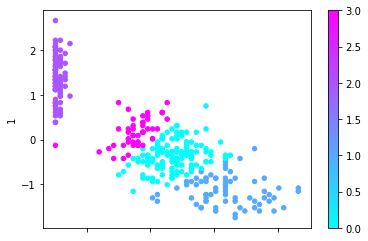

val -4.968186761323693 normed to 0.003181323867630681 to color [255, 4, 0]
mapping led 5
val -4.968186761323693 normed to 0.003181323867630681 to color [255, 4, 0]
mapping led 11
val -3.742676457282059 normed to 0.12573235427179408 to color [255, 192, 0]
mapping led 6
val -3.742676457282059 normed to 0.12573235427179408 to color [255, 192, 0]
mapping led 20
val 2.5468231840583417 normed to 0.7546823184058342 to color [134, 0, 255]
mapping led 7
val 2.5468231840583417 normed to 0.7546823184058342 to color [134, 0, 255]
mapping led 28
val 4.8329452221495925 normed to 0.9832945222149594 to color [255, 0, 25]
mapping led 0
val 4.8329452221495925 normed to 0.9832945222149594 to color [255, 0, 25]
mapping led 10
val 1.5854481411580035 normed to 0.6585448141158003 to color [0, 12, 255]
mapping led 1
val 1.5854481411580035 normed to 0.6585448141158003 to color [0, 12, 255]
mapping led 18
val -3.5162005229493056 normed to 0.14837994770506943 to color [255, 227, 0]
mapping led 2
val -3.516200522

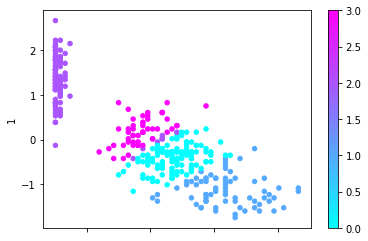

val -4.579655036586235 normed to 0.04203449634137648 to color [255, 64, 0]
mapping led 5
val -4.579655036586235 normed to 0.04203449634137648 to color [255, 64, 0]
mapping led 11
val -4.695682786309481 normed to 0.030431721369051878 to color [255, 46, 0]
mapping led 6
val -4.695682786309481 normed to 0.030431721369051878 to color [255, 46, 0]
mapping led 20
val 2.790093455270398 normed to 0.7790093455270398 to color [171, 0, 255]
mapping led 7
val 2.790093455270398 normed to 0.7790093455270398 to color [171, 0, 255]
mapping led 28
val 5.00215137875853 normed to 1.0 to color [255, 0, 0]
mapping led 0
val 5.00215137875853 normed to 1.0 to color [255, 0, 0]
mapping led 10
val 2.547633931033834 normed to 0.7547633931033835 to color [134, 0, 255]
mapping led 1
val 2.547633931033834 normed to 0.7547633931033835 to color [134, 0, 255]
mapping led 18
val -3.680742787770823 normed to 0.13192572122291768 to color [255, 201, 0]
mapping led 2
val -3.680742787770823 normed to 0.13192572122291768 to

In [13]:
for i in range(10):
    nn.fit(X_train, y_train)
    print(nn.score(X_test, y_test))
    plot_multi_lables(X_test,nn.predict(X_test))
    print(rgb.display_weights(nn))

In [14]:
nn.coefs_

[array([[-4.57965504, -4.69568279,  2.79009346],
        [ 5.00215138,  2.54763393, -3.68074279]]),
 array([[ 4.00549206,  5.11319744],
        [-8.82935131,  4.47722154],
        [ 5.13439608, -7.08221127]])]